# Interpolación. Integración numérica: métodos del Trapacio y Simpson.

# Integración numérica. Longitud de curvas.

### Ejercicio 25.-  Hallar la longitud de la primera espira de la espiral de Arquímedes $\rho(\theta)=a\theta, a= 2$, utilizando el método de Simpson y una cota de error absoluto menor que $10^{−3}$.

SOLUCIÓN

Comenzamos dibujando la primera espira de la espiral de Arquímides. Para ello, usamos la sentencia "polar_plot".

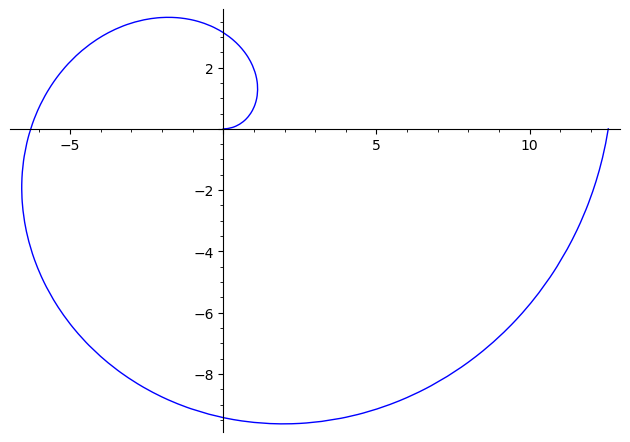

In [1]:
angulo=var('angulo')
polar_plot( 2*angulo , (angulo, 0, 2*pi)) #dibuja de una espira

Observamos como se va moviendo la espiral de Arquímides a medida que aumentamos el rango donde se mueve el ángulo.

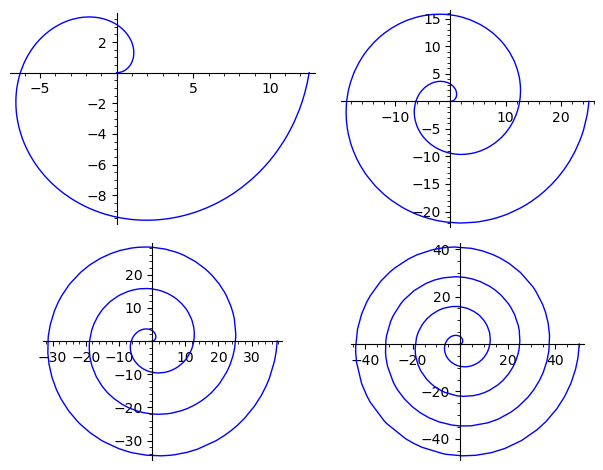

In [2]:
P1=polar_plot( 2*angulo , (angulo, 0, 2*pi)) 
P2=polar_plot( 2*angulo , (angulo, 0, 4*pi))
P3=polar_plot( 2*angulo , (angulo, 0, 6*pi))
P4=polar_plot( 2*angulo , (angulo, 0, 8*pi))
graphics_array(((P1,P2), (P3,P4)))# evolución de la espiral

Sabemos que si la curva $C$ viene descrita en coordenadas polares porla función $\rho=\rho(\theta)$ con $\theta \in [\theta_0,\theta_1]$, donde  $(\rho(\theta), \theta)$ son las coordenadas polares de un punto genérico de la curva, entonces su longitud viene dada por
$$
L_C=\int_{\theta_0}^{\theta_1} \sqrt{\rho(\theta)^2+\rho'(\theta)^2}.
$$

Tenemos que buscar la función que vamos a integrar:
$$f(\theta)=\sqrt{\rho(\theta)^2+\rho'(\theta)^2}=\sqrt{(a\theta)^2+a^2}=a\sqrt{1+\theta^2}$$
Otra opción, es realizar las siguientes sentencias para que el propio SAGE lo calcule.

In [3]:
a=0
b=2*pi

In [4]:
rho=2*angulo
g(angulo)=expand(rho^2+diff(rho,angulo)^2).simplify_trig()
f(angulo)=sqrt(g)
f

angulo |--> 2*sqrt(angulo^2 + 1)

El calculo de la longitud de la espiral de Arquímides es la siguiente:

In [6]:
integral(f,angulo,a,b).n()

42.5125882964182

Realizamos la aproximación de dicha integral recordando como funciona el Método de Simpson: 

La aproximación se hace con la siguiente fórmula:
 $$  \int_{a}^{b} f(\theta) \, d\theta \ \approx \ {{\rm Simpson}_{ {{\bf n}}}(f)}=  \frac{b-a}{6n}\left(f(\theta_0)+4\sum_{k=1}^n f(x_{2k-1})+2\sum_{k=1}^{n-1}f(x_{2k})+f(\theta_1)\right) $$
La cota del error absoluto cometido es
<p style="text-align: center;">$\displaystyle \left| {\rm Simpson}_{n}(f)-\int_a^b f(\theta) \, d\theta\right| \leq \dfrac{(b-a)^5}{180\cdot  (2\cdot n)^4}\cdot M$</p>
<p>siendo $M>0$ una constante tal que $|f^{(4)}(\theta)|\leq M$ para todo $x\in [a,b]$. 
    
Para determinar $M$ representamos gráficamente $|f^{(4)}(\theta)|$ en el intervalo $[a,b]$:</p>

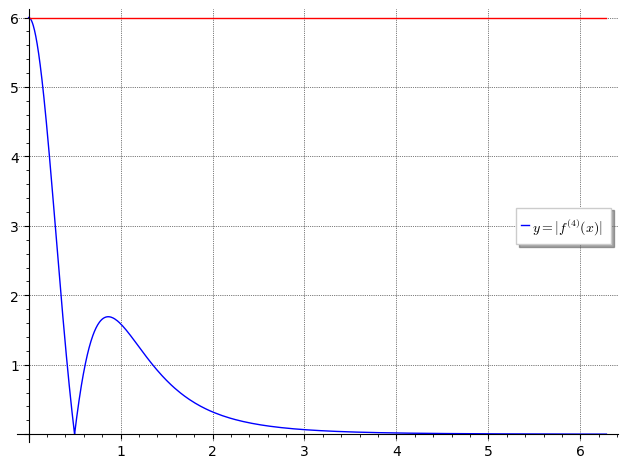

In [7]:
plot(abs(diff(f(x),x,4)),a,b,gridlines=True,legend_label='$y=|f^{(4)}(x)|$')+plot(6,a,b,color='red')

En la gráfica anterior vemos que se puede tomar $M=6$. Como $\displaystyle \left|{\rm Simpson}_n(f)-\int_a^b f(x) \, dx\right| \leq \dfrac{(b-a)^5}{180 \cdot (2n)^4}\cdot M$ 
para todo $n\in \mathbb{N}$ 

entonces busquemos un número de parábolas $n$ que lo cumpla.

In [8]:
M=6
epsilon=10^(-3)
n=1
while (b-a)^5*M/(180*2^4*n^4)>epsilon:
    n=n+1
n 

12

Por tanto, vamos a aplicar el método de Simpson con $n=12$ parábolas. Así, vamos a necesitar $2n+1=25$ evaluaciones de la función $f(angulo)$ para obtener la aproximación de la integral mediante el método de Simpson con error absoluto menor que $10^{-3}$. 

In [9]:
X=[a+k*(b-a)/(2*n) for k in [0..2*n]] # Puntos auxiliares
show(X)

[0,
 1/12*pi,
 1/6*pi,
 1/4*pi,
 1/3*pi,
 5/12*pi,
 1/2*pi,
 7/12*pi,
 2/3*pi,
 3/4*pi,
 5/6*pi,
 11/12*pi,
 pi,
 13/12*pi,
 7/6*pi,
 5/4*pi,
 4/3*pi,
 17/12*pi,
 3/2*pi,
 19/12*pi,
 5/3*pi,
 7/4*pi,
 11/6*pi,
 23/12*pi,
 2*pi]

In [10]:
simpson=(b-a)/(6*n)*(f(X[0])+4*sum(f(X[2*k-1]) for k in [1..n])+2*sum(f(X[2*k]) for k in [1..n-1])+f(X[2*n]))
simpson.n()

42.5125884569279

<p><strong>NOTA.</strong> Vamos a "comprobar" que efectivamente el error cometido es menor que $10^{-3}$.</p>
<p>Para ello calculamos el valor "exacto" de la integral usando una aproximación numérica (más precisa) dada por SAGE:</p>

In [11]:
integralSAGE=integral(f(x),x,a,b).n()
integralSAGE,simpson.n()

(42.5125882964182, 42.5125884569279)

Comparamos el valor "exacto" con el resultado obtenido por el método de Simpson, comprobando que el error "real" es menor que $10^{-3}$: 

In [12]:
abs(simpson.n()-integralSAGE)

1.60509735280812e-7

In [13]:
abs(simpson.n()-integralSAGE) < 10^(-3)

True

De forma adicional se invita a dibujar con vuestro SAGE lo calculado, $f$, y las parábolas.